In [64]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder,StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns

In [65]:
df = pd.read_csv("IMDb_Movies_India.csv", encoding='latin1')
df

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
0,,NaN,NaN,Drama,NaN,NaN,J.S. Randhawa,Manmauji,Birbal,Rajendra Bhatia
1,#Gadhvi (He thought he was Gandhi),(2019),109 min,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
2,#Homecoming,(2021),90 min,"Drama, Musical",NaN,NaN,Soumyajit Majumdar,Sayani Gupta,Plabita Borthakur,Roy Angana
3,#Yaaram,(2019),110 min,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
4,...And Once Again,(2010),105 min,Drama,NaN,NaN,Amol Palekar,Rajat Kapoor,Rituparna Sengupta,Antara Mali
...,...,...,...,...,...,...,...,...,...,...
15504,Zulm Ko Jala Doonga,(1988),NaN,Action,4.6,11,Mahendra Shah,Naseeruddin Shah,Sumeet Saigal,Suparna Anand
15505,Zulmi,(1999),129 min,"Action, Drama",4.5,655,Kuku Kohli,Akshay Kumar,Twinkle Khanna,Aruna Irani
15506,Zulmi Raj,(2005),NaN,Action,NaN,NaN,Kiran Thej,Sangeeta Tiwari,NaN,NaN
15507,Zulmi Shikari,(1988),NaN,Action,NaN,NaN,NaN,NaN,NaN,NaN


In [66]:
df['Genre'] = df['Genre'].fillna('')
genre_multi_hot = df['Genre'].str.get_dummies(sep=',')
df = pd.concat([df, genre_multi_hot], axis=1)

In [67]:
le=LabelEncoder()
df["Actor 1"]=le.fit_transform(df["Actor 1"])
df["Actor 2"]=le.fit_transform(df["Actor 2"])
df["Actor 3"]=le.fit_transform(df["Actor 3"])
df["Director"]=le.fit_transform(df["Director"])
df['Year'] = pd.to_numeric(df['Year'].str.extract('(\d+)')[0],errors='coerce').fillna(0).astype(int)
df['Duration'] = df['Duration'].str.extract('(\d+)').astype(float)
df['Votes'] = pd.to_numeric(df['Votes'].str.replace(',', '').str.extract('(\d+)')[0], errors='coerce').fillna(0).astype(int)

In [68]:
df.drop(['Name','Genre'],axis=1,inplace=True)

In [69]:
df

,Year,Duration,Rating,Votes,Director,Actor 1,Actor 2,Actor 3,Action,Adventure,...,Horror,Music,Musical,Mystery,Reality-TV,Romance,Sci-Fi,Sport,Thriller,War
0,0,NaN,NaN,0,1926,2250,800,3108,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2019,109.0,7.0,8,1548,3280,4790,527,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2021,90.0,NaN,0,5123,3713,2866,3450,0,0,...,0,0,0,0,0,0,0,0,0,0
3,2019,110.0,4.4,35,3319,2917,1504,4020,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2010,105.0,NaN,0,385,3112,3462,405,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15504,1988,NaN,4.6,11,2690,2586,4299,4262,0,0,...,0,0,0,0,0,0,0,0,0,0
15505,1999,129.0,4.5,655,2499,227,4532,519,0,0,...,0,0,0,0,0,0,0,0,0,0
15506,2005,NaN,NaN,0,2424,3609,4891,4820,0,0,...,0,0,0,0,0,0,0,0,0,0
15507,1988,NaN,NaN,0,5938,4718,4891,4820,0,0,...,0,0,0,0,0,0,0,0,0,0


In [70]:
df.isnull().sum()

Year              0
Duration       8269
Rating         7590
Votes             0
Director          0
Actor 1           0
Actor 2           0
Actor 3           0
 Action           0
 Adventure        0
 Biography        0
 Comedy           0
 Crime            0
 Drama            0
 Family           0
 Fantasy          0
 History          0
 Horror           0
 Music            0
 Musical          0
 Mystery          0
 News             0
 Reality-TV       0
 Romance          0
 Sci-Fi           0
 Short            0
 Sport            0
 Thriller         0
 War              0
 Western          0
Action            0
Adventure         0
Animation         0
Biography         0
Comedy            0
Crime             0
Documentary       0
Drama             0
Family            0
Fantasy           0
History           0
Horror            0
Music             0
Musical           0
Mystery           0
Reality-TV        0
Romance           0
Sci-Fi            0
Sport             0
Thriller          0


In [71]:
df['Year'] = df['Year'].fillna(df['Year'].mode()[0])
df['Duration'] = df['Duration'].fillna(df['Duration'].median())
df['Rating'] = df['Rating'].fillna(df['Rating'].mean())
df['Votes'] = df['Votes'].fillna(df['Votes'].median())

In [72]:
df.isnull().sum()

Year           0
Duration       0
Rating         0
Votes          0
Director       0
Actor 1        0
Actor 2        0
Actor 3        0
 Action        0
 Adventure     0
 Biography     0
 Comedy        0
 Crime         0
 Drama         0
 Family        0
 Fantasy       0
 History       0
 Horror        0
 Music         0
 Musical       0
 Mystery       0
 News          0
 Reality-TV    0
 Romance       0
 Sci-Fi        0
 Short         0
 Sport         0
 Thriller      0
 War           0
 Western       0
Action         0
Adventure      0
Animation      0
Biography      0
Comedy         0
Crime          0
Documentary    0
Drama          0
Family         0
Fantasy        0
History        0
Horror         0
Music          0
Musical        0
Mystery        0
Reality-TV     0
Romance        0
Sci-Fi         0
Sport          0
Thriller       0
War            0
dtype: int64

In [73]:
col = df.pop('Rating')
df.insert(0, 'Rating', col)
df

,Rating,Year,Duration,Votes,Director,Actor 1,Actor 2,Actor 3,Action,Adventure,...,Horror,Music,Musical,Mystery,Reality-TV,Romance,Sci-Fi,Sport,Thriller,War
0,5.841621,0,131.0,0,1926,2250,800,3108,0,0,...,0,0,0,0,0,0,0,0,0,0
1,7.000000,2019,109.0,8,1548,3280,4790,527,0,0,...,0,0,0,0,0,0,0,0,0,0
2,5.841621,2021,90.0,0,5123,3713,2866,3450,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4.400000,2019,110.0,35,3319,2917,1504,4020,0,0,...,0,0,0,0,0,0,0,0,0,0
4,5.841621,2010,105.0,0,385,3112,3462,405,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15504,4.600000,1988,131.0,11,2690,2586,4299,4262,0,0,...,0,0,0,0,0,0,0,0,0,0
15505,4.500000,1999,129.0,655,2499,227,4532,519,0,0,...,0,0,0,0,0,0,0,0,0,0
15506,5.841621,2005,131.0,0,2424,3609,4891,4820,0,0,...,0,0,0,0,0,0,0,0,0,0
15507,5.841621,1988,131.0,0,5938,4718,4891,4820,0,0,...,0,0,0,0,0,0,0,0,0,0


In [74]:
x=df.iloc[:,1:]
y=df['Rating']

In [75]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=4)

In [77]:
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(x_train, y_train)

RandomForestRegressor(random_state=42)

In [78]:
y_pred = model.predict(x_test)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f"Test RMSE: {rmse:.3f}")

Test RMSE: 0.792


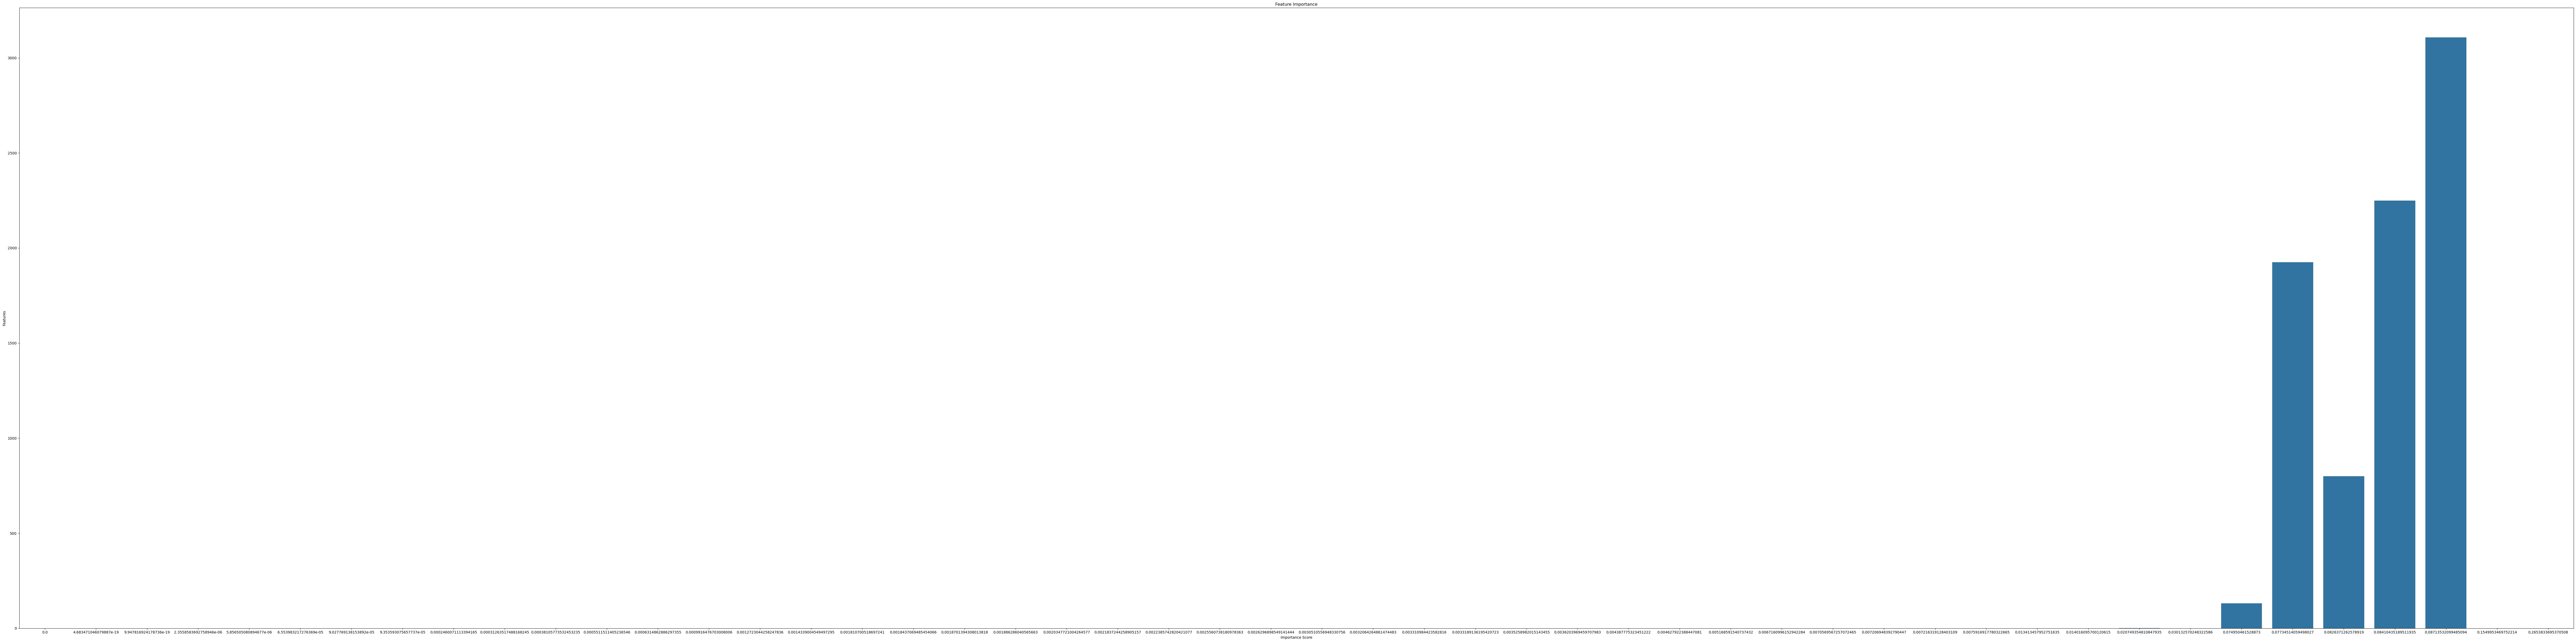

In [93]:
feat_importances = pd.Series(model.feature_importances_, index=df.iloc[0,1:])
plt.figure(figsize=(100, 25))  # Wider and taller figure
sns.barplot(x=feat_importances, y=feat_importances.index)
plt.title('Feature Importance')
plt.xlabel('Importance Score')
plt.ylabel('Features')
plt.tight_layout()
plt.show()